# ECO491: Homework 1

In [ ]:
# Relevant basic Python libraries

import pandas as pd   # Excel sheet manipulation
import numpy as np  # Numerical operations
import matplotlib.pyplot as plt  # Histograms and bar charts
import seaborn as sns  # Visualizations
from scipy.stats import norm
from statsmodels.graphics.tsaplots import plot_acf

                  BAC      SPY  BAC Daily Returns  SPY Daily Returns
Date                                                                
2010-01-05  16.200001  1136.52           0.032505           0.003116
2010-01-06  16.389999  1137.14           0.011728           0.000546
2010-01-07  16.930000  1141.69           0.032947           0.004001
2010-01-08  16.780001  1144.98          -0.008860           0.002882
2010-01-11  16.930000  1146.98           0.008939           0.001747
...               ...      ...                ...                ...
2024-12-24  44.380001  6040.04           0.011164           0.011043
2024-12-26  44.549999  6037.59           0.003831          -0.000406
2024-12-27  44.340000  5970.84          -0.004714          -0.011056
2024-12-30  43.910000  5906.94          -0.009698          -0.010702
2024-12-31  43.950001  5881.63           0.000911          -0.004285

[3773 rows x 4 columns]
-----------------Stylized Fact 1-----------------


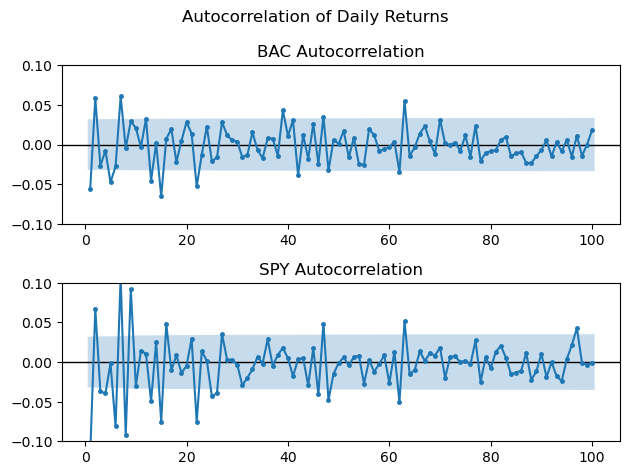

-----------------Stylized Fact 2-----------------


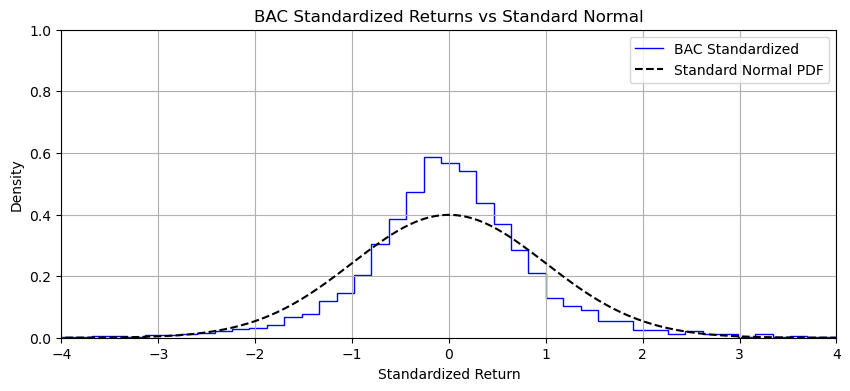

(0.0, 1.0)

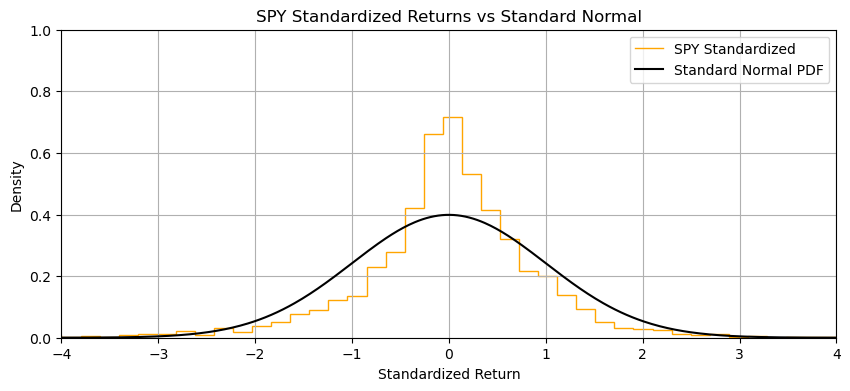

In [ ]:
# Question 1 Coding Portion

df_BAC = pd.read_excel("../data/BAC_2010_2024.xlsx").set_index("Date")
df_SPY = pd.read_excel("../data/SPY_2010_2024.xlsx").set_index("Date")

df_returns = pd.merge(df_BAC, df_SPY, left_index=True, right_index=True)

df_returns = df_returns.rename(columns={"Close Price_x": "BAC", "Close Price_y": "SPY"})

# Calculating Daily Returns
df_returns["BAC Daily Returns"] = df_returns["BAC"].pct_change()
df_returns["SPY Daily Returns"] = df_returns["SPY"].pct_change()

df_returns = df_returns.dropna(subset=["BAC Daily Returns", "SPY Daily Returns"])

print(df_returns)

# Stylized Fact 1: Autocorrelation function represented and formatted to match the example in the lecture slides
print("-----------------Stylized Fact 1-----------------")
fig, (ax1_1, ax1_2) = plt.subplots(2)
fig.suptitle("Autocorrelation of Daily Returns")

ax1_1.axhline(0, color="black", linewidth=1)
ax1_2.axhline(0, color="black", linewidth=1)

plot_acf(df_returns["BAC Daily Returns"],ax=ax1_1,lags=100,title="BAC Autocorrelation", zero=False, use_vlines=False, marker='.', linestyle="-")
ax1_1.set_ylim(-0.10, 0.10) 

plot_acf(df_returns["SPY Daily Returns"],ax=ax1_2,lags=100,title="SPY Autocorrelation", zero=False, use_vlines=False, marker='.', linestyle="-")
ax1_2.set_ylim(-0.10, 0.10) 
plt.tight_layout()
plt.show()

# Stylized Fact 2: Overlaid with a normal distribution to observe non-normality of returns
print("-----------------Stylized Fact 2-----------------")

BAC_standardized = (df_returns["BAC Daily Returns"] - df_returns["BAC Daily Returns"].mean()) / df_returns["BAC Daily Returns"].std()
SPY_standardized = (df_returns["SPY Daily Returns"] - df_returns["SPY Daily Returns"].mean()) / df_returns["SPY Daily Returns"].std()

x = np.linspace(-5, 5, 500)
standard_normal_pdf = norm.pdf(x, loc=0, scale=1)

counts_bac, bins_bac = np.histogram(BAC_standardized, bins=100, density=True)
plt.figure(figsize=(10, 4))
plt.stairs(counts_bac, bins_bac, label="BAC Standardized", color="blue")
plt.plot(x, standard_normal_pdf, label="Standard Normal PDF", color="black", linestyle="--")
plt.title("BAC Standardized Returns vs Standard Normal")
plt.xlabel("Standardized Return")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.xlim(-5, 5)
plt.ylim(0, 1)
plt.show()

counts_spy, bins_spy = np.histogram(SPY_standardized, bins=100, density=True)
plt.figure(figsize=(10, 4))
plt.stairs(counts_spy, bins_spy, label="SPY Standardized", color="orange")
plt.plot(x, standard_normal_pdf, label="Standard Normal PDF", color="black", linestyle="-")
plt.title("SPY Standardized Returns vs Standard Normal")
plt.xlabel("Standardized Return")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.xlim(-5, 5)
plt.ylim(0, 1)

# Stylized Fact 3

# Stylized Fact 4

# Stylized Fact 5